In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from IPython.display import display

In [2]:
data_original=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data=data_original.copy()
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.columns=data.columns.str.lower()
data.drop(["customerid"],axis=1,inplace=True)
print (data.columns)
for coulmn in data.columns:
    if data[coulmn].dtype=="object":
        data[coulmn]=data[coulmn].str.lower()


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [5]:
data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.5,no
7039,female,0,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card (automatic),103.20,7362.9,no
7040,female,0,yes,yes,11,no,no phone service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic check,29.60,346.45,no
7041,male,1,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,74.40,306.6,yes


In [6]:
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.describe(include="object")

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,,no
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
data["seniorcitizen"]=data["seniorcitizen"].astype("object")
data["totalcharges"]=pd.to_numeric(data["totalcharges"],errors="coerce")
data["churn"]=(data["churn"]=="yes").astype("int64")
print(data.isnull().sum())
data.dropna(inplace=True)
data.describe()


gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


,tenure,monthlycharges,totalcharges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<Axes: xlabel='churn', ylabel='tenure'>

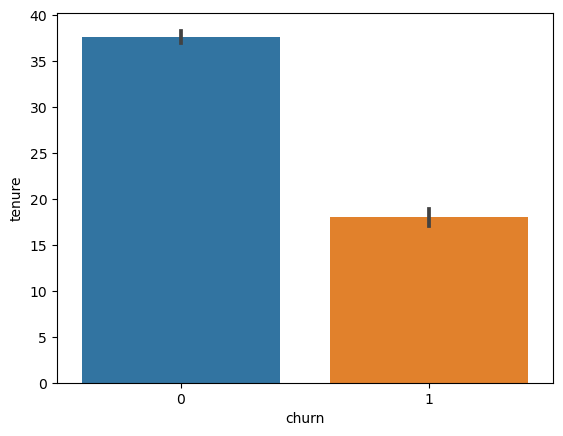

In [9]:
sns.barplot(x=data["churn"],y=data["tenure"])

<Axes: xlabel='churn', ylabel='monthlycharges'>

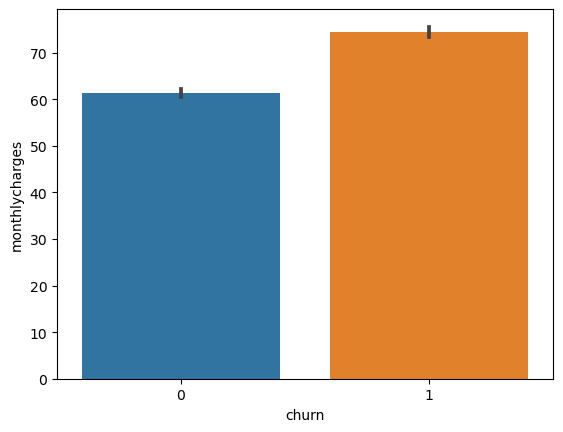

In [10]:
sns.barplot(x=data["churn"],y=data["monthlycharges"])

<Axes: xlabel='churn', ylabel='totalcharges'>

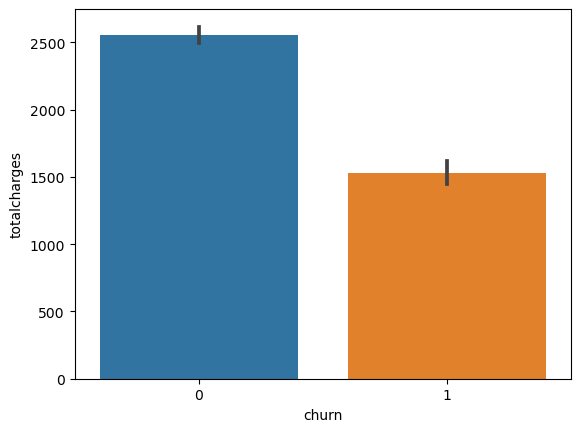

In [11]:
sns.barplot(x=data["churn"],y=data["totalcharges"])

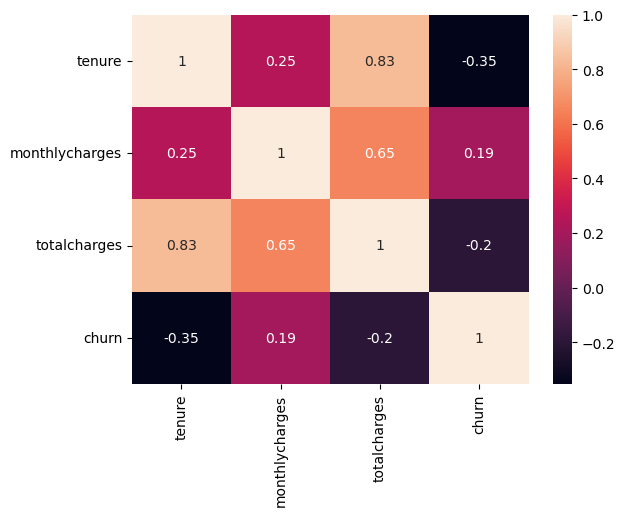

In [12]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
data.drop(["totalcharges"],axis=1,inplace=True)

In [13]:
data.describe(include="object")

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,male,0,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [14]:
print(data["churn"].value_counts())
print(1869/7042)
print(data["churn"].mean())

churn
0    5163
1    1869
Name: count, dtype: int64
0.2654075546719682
0.26578498293515357


In [15]:
male=data[data["gender"]=="male"]
female=data[data["gender"]=="female"]
print(male["churn"].mean())
print(female["churn"].mean())
#equal to
data.groupby("gender")["churn"].agg("mean")


0.26204564666103125
0.2695951765719208


gender
female    0.269595
male      0.262046
Name: churn, dtype: float64

In [16]:
categoricals=data.select_dtypes("object").columns
categoricals

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [17]:
for cat in categoricals:
   df=display(pd.DataFrame(data.groupby(cat)["churn"].agg("mean")))

,churn
gender,
female,0.269595
male,0.262046


,churn
seniorcitizen,
0,0.236503
1,0.416813


,churn
partner,
no,0.329761
yes,0.197171


,churn
dependents,
no,0.312791
yes,0.155312


,churn
phoneservice,
no,0.250000
yes,0.267475


,churn
multiplelines,
no,0.250812
no phone service,0.250000
yes,0.286485


,churn
internetservice,
dsl,0.189983
fiber optic,0.418928
no,0.074342


,churn
onlinesecurity,
no,0.417787
no internet service,0.074342
yes,0.146402


,churn
onlinebackup,
no,0.399417
no internet service,0.074342
yes,0.215670


,churn
deviceprotection,
no,0.391403
no internet service,0.074342
yes,0.225393


,churn
techsupport,
no,0.416475
no internet service,0.074342
yes,0.151961


,churn
streamingtv,
no,0.335351
no internet service,0.074342
yes,0.301147


,churn
streamingmovies,
no,0.337289
no internet service,0.074342
yes,0.299524


,churn
contract,
month-to-month,0.427097
one year,0.112772
two year,0.028487


,churn
paperlessbilling,
no,0.163757
yes,0.335893


,churn
paymentmethod,
bank transfer (automatic),0.167315
credit card (automatic),0.152531
electronic check,0.452854
mailed check,0.192020


In [18]:
data["multiplelines"]=np.where(data["multiplelines"]=="no phone service","no","yes")
data.drop(["gender","phoneservice"],axis=1,inplace=True)

In [19]:

print((data["deviceprotection"]==data["onlinebackup"]).value_counts())

print((data["streamingtv"]==data["onlinebackup"]).value_counts())

print((data["deviceprotection"]==data["streamingtv"]).value_counts())

print((data["streamingmovies"]==data["onlinebackup"]).value_counts())

print((data["streamingtv"]==data["streamingmovies"]).value_counts())

True     4819
False    2213
Name: count, dtype: int64
True     4684
False    2348
Name: count, dtype: int64
True     5037
False    1995
Name: count, dtype: int64
True     4654
False    2378
Name: count, dtype: int64
True     5476
False    1556
Name: count, dtype: int64


In [20]:
data .info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7032 non-null   object 
 1   partner           7032 non-null   object 
 2   dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   multiplelines     7032 non-null   object 
 5   internetservice   7032 non-null   object 
 6   onlinesecurity    7032 non-null   object 
 7   onlinebackup      7032 non-null   object 
 8   deviceprotection  7032 non-null   object 
 9   techsupport       7032 non-null   object 
 10  streamingtv       7032 non-null   object 
 11  streamingmovies   7032 non-null   object 
 12  contract          7032 non-null   object 
 13  paperlessbilling  7032 non-null   object 
 14  paymentmethod     7032 non-null   object 
 15  monthlycharges    7032 non-null   float64
 16  churn             7032 non-null   int64  
dtype

In [21]:
data=pd.get_dummies(data)
X=data.drop(["churn"],axis=1)
y=data["churn"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
model=RidgeClassifier()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0.8067555555555556


0.7910447761194029


In [23]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model2=RidgeClassifier()
model2.fit(X_train_scaled,y_train)
print(model2.score(X_train_scaled,y_train))
print(model2.score(X_test_scaled,y_test))



0.8056888888888889
0.7903340440653873


In [24]:
model3=SVC(kernel="linear")
model3.fit(X_train,y_train)
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))

0.8051555555555555
0.7960199004975125
